<a href="https://colab.research.google.com/github/SabaSaeed4/Deep-learning-practice/blob/main/transfer_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten # last layer
from keras.models import Model 
from keras.applications.xception import Xception # cut off the last layer. Create four outputby using no: of classes
from keras.applications.xception import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator # Do Data Augmentation by generating different images
from keras.models import Sequential 
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
IMAGE_SIZE = [224,224]

In [ ]:
train_path = 'images\Train'
test_path = 'images\Test'

In [ ]:
#removed last layer
vgg = Xception(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top= False)

83683744/83683744 [==============================] - 0s 0us/step


In [ ]:
for layer in vgg.layers:
    layer.trainable = False # beacuse layers are already trained. State-of-art algorithm
    

In [ ]:
folders = glob('/content/drive/MyDrive/Colab Notebooks/images/Train/*')

In [ ]:
folders

['/content/drive/MyDrive/Colab Notebooks/images/Train/tomato',
 '/content/drive/MyDrive/Colab Notebooks/images/Train/potato',
 '/content/drive/MyDrive/Colab Notebooks/images/Train/pepper']

In [ ]:
x = Flatten()(vgg.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

In [ ]:
model = Model(inputs= vgg.input, outputs= prediction)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 111, 111, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                             

In [ ]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
trainning_set = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Colab Notebooks/images/Train',
    target_size=(224,224),
    batch_size=32,
    class_mode= 'categorical'
)

test_set = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/Colab Notebooks/images/Test',
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical'
)

Found 34 images belonging to 3 classes.
Found 9 images belonging to 3 classes.


In [ ]:
r = model.fit(
    trainning_set,
    validation_data= test_set,
    epochs = 50,
    steps_per_epoch=len(trainning_set),
    validation_steps= len(test_set)
)

Epoch 1/50
2/2 [==============================] - 15s 5s/step - loss: 15.7020 - accuracy: 0.2941 - val_loss: 6.0362 - val_accuracy: 0.3333
Epoch 2/50
2/2 [==============================] - 1s 581ms/step - loss: 1.0588 - accuracy: 0.6765 - val_loss: 3.7709 - val_accuracy: 0.4444
Epoch 3/50
2/2 [==============================] - 1s 612ms/step - loss: 1.6669 - accuracy: 0.7353 - val_loss: 4.0640 - val_accuracy: 0.6667
Epoch 4/50
2/2 [==============================] - 1s 102ms/step - loss: 1.8514 - accuracy: 0.7941 - val_loss: 0.4772 - val_accuracy: 0.8889
Epoch 5/50
2/2 [==============================] - 1s 105ms/step - loss: 0.5000 - accuracy: 0.9412 - val_loss: 0.4048 - val_accuracy: 0.8889
Epoch 6/50
2/2 [==============================] - 1s 567ms/step - loss: 0.5658 - accuracy: 0.8235 - val_loss: 0.9654 - val_accuracy: 0.7778
Epoch 7/50
2/2 [==============================] - 1s 111ms/step - loss: 1.0253 - accuracy: 0.8529 - val_loss: 0.2597 - val_accuracy: 0.8889
Epoch 8/50
2/2 [=====

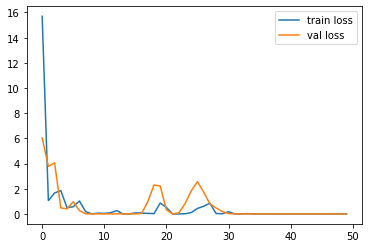

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

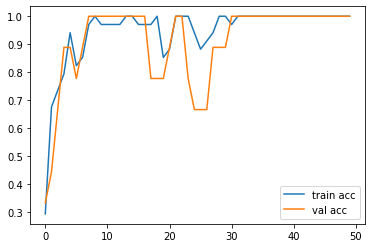

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

In [ ]:
r.history

{'loss': [15.70196533203125,
  1.0588120222091675,
  1.6669423580169678,
  1.8513599634170532,
  0.50002121925354,
  0.5658072829246521,
  1.0253194570541382,
  0.18198277056217194,
  0.006218158174306154,
  0.05881680175662041,
  0.039852116256952286,
  0.0916098803281784,
  0.26546046137809753,
  0.0027277683839201927,
  0.0006854619132354856,
  0.08110266923904419,
  0.06714706867933273,
  0.04273153841495514,
  0.020714325830340385,
  0.8631027936935425,
  0.5158603191375732,
  7.246864242915763e-06,
  0.0004948599962517619,
  0.010020803660154343,
  0.10803836584091187,
  0.4346681535243988,
  0.6072091460227966,
  0.8523789048194885,
  0.031324662268161774,
  0.01539637055248022,
  0.17707738280296326,
  8.504538709530607e-05,
  6.556454081874108e-07,
  0.021469274535775185,
  2.9451615546349785e-07,
  3.930146249331301e-06,
  3.043345350306481e-05,
  3.53084942616988e-05,
  0.002913867821916938,
  9.514532393950503e-06,
  0.0018928577192127705,
  1.4506800653180107e-05,
  3.2453

In [ ]:
model.save("model_using_xception.h5")

In [ ]:
predict_datagen = ImageDataGenerator( rescale = 1./255 )

predict_generator =  predict_datagen.flow_from_directory(
                    "/content/drive/MyDrive/Colab Notebooks/images/Test/",
                    target_size=(224,224),
                    batch_size=32,
                    class_mode= 'categorical'
                    )

Found 14 images belonging to 3 classes.


In [ ]:
pred = model.predict_generator(predict_generator,verbose=1)

1/1 [==============================] - 0s 78ms/step


<ipython-input-36-9ab07299187b>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  pred = model.predict_generator(predict_generator,verbose=1)


In [ ]:
import numpy as np
predicted_class_indices=np.argmax(pred,axis=1)

In [ ]:
predicted_class_indices

array([0, 2, 2, 0, 2, 2, 0, 1, 1, 2, 1, 0, 1, 1])

In [ ]:
labels = (trainning_set.class_indices)
print(labels)

{'pepper': 0, 'potato': 1, 'tomato': 2}


In [ ]:
labels = dict((v,k) for k,v in labels.items())
print(labels)

{0: 'pepper', 1: 'potato', 2: 'tomato'}


In [ ]:
predictions = [labels[k] for k in predicted_class_indices]
print(predictions)

['pepper', 'tomato', 'tomato', 'pepper', 'tomato', 'tomato', 'pepper', 'potato', 'potato', 'tomato', 'potato', 'pepper', 'potato', 'potato']


14